## Aplicação de algorimos de clusterização como DBSCAN para datasets ou conjuntos de dados que são multidimensionais

In [165]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Conjunto de dados:

The Complete Pokemon Dataset - Kaggle

https://www.kaggle.com/rounakbanik/pokemon 

In [177]:
dataset_filename = 'datasets/pokemon.csv'

In [178]:
df_pokemon = pd.read_csv(dataset_filename, engine='python', index_col=0)

In [181]:
df_pokemon.sample(4)

against_bug  against_dark  \
abilities                                                                  
['Lightningrod', 'Rock Head', 'Reckless']             1.00           1.0   
['Rock Head', 'Lightningrod', 'Battle Armor']         1.00           1.0   
['Levitate']                                          0.50           1.0   
['Aftermath', 'Unburden', 'Flare Boost']              0.25           2.0   

                                               against_dragon  \
abilities                                                       
['Lightningrod', 'Rock Head', 'Reckless']                 1.0   
['Rock Head', 'Lightningrod', 'Battle Armor']             1.0   
['Levitate']                                              1.0   
['Aftermath', 'Unburden', 'Flare Boost']                  1.0   

                                               against_electric  \
abilities                                                         
['Lightningrod', 'Rock Head', 'Reckless']                   0.0   
['Rock Head', 'Lightningrod', 'Battle Armor']               0.0   
['Levitate']                                                1.0   
['Aftermath', 'Unburden', 'Flare Boost']                    2.0   

                                               against_fairy  against_fight  \
abilities                                                                     
['Lightningrod', 'Rock Head', 'Reckless']                1.0            2.0   
['Rock Head', 'Lightningrod', 'Battle Armor']            1.0            1.0   
['Levitate']                                             0.5            0.5   
['Aftermath', 'Unburden', 'Flare Boost']                 1.0            0.0   

                                               against_fire  against_flying  \
abilities                                                                     
['Lightningrod', 'Rock Head', 'Reckless']               0.5             0.5   
['Rock Head', 'Lightningrod', 'Battle Armor']           1.0             1.0   
['Levitate']                                            1.0             1.0   
['Aftermath', 'Unburden', 'Flare Boost']                1.0             1.0   

                                               against_ghost  against_grass  \
abilities                                                                     
['Lightningrod', 'Rock Head', 'Reckless']                1.0            4.0   
['Rock Head', 'Lightningrod', 'Battle Armor']            1.0            2.0   
['Levitate']                                             1.0            0.5   
['Aftermath', 'Unburden', 'Flare Boost']                 2.0            0.5   

                                               ...  percentage_male  \
abilities                                      ...                    
['Lightningrod', 'Rock Head', 'Reckless']      ...             50.0   
['Rock Head', 'Lightningrod', 'Battle Armor']  ...             50.0   
['Levitate']                                   ...             50.0   
['Aftermath', 'Unburden', 'Flare Boost']       ...             50.0   

                                               pokedex_number  sp_attack  \
abilities                                                                  
['Lightningrod', 'Rock Head', 'Reckless']                 111         30   
['Rock Head', 'Lightningrod', 'Battle Armor']             104         40   
['Levitate']                                              109         60   
['Aftermath', 'Unburden', 'Flare Boost']                  426         90   

                                               sp_defense  speed   type1  \
abilities                                                                  
['Lightningrod', 'Rock Head', 'Reckless']              30     25  ground   
['Rock Head', 'Lightningrod', 'Battle Armor']          50     35  ground   
['Levitate']                                           45     35  poison   
['Aftermath', 'Unburden', 'Flare Boost']               54     80   ghost   

                              

In [182]:
df_pokemon.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

In [183]:
columns = ['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water']

In [184]:
df_pokemon = df_pokemon[columns]

In [185]:
X = df_pokemon[columns].values

In [226]:
dbscan = DBSCAN(eps=2, min_samples=3)

In [227]:
dbscan

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [228]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [229]:
dbscan.labels_[:22]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [230]:
#y_dbscan = dbscan.fit_predict(X)
y_dbscan = dbscan.labels_

"\nfor i in range(0, pca_2d.shape[0]):\n    if dbscan.labels_[i] % 2 == 0:\n        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='+')\n    elif dbscan.labels_[i] % 2 == 1:\n        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')\n    elif dbscan.labels_[i] == -1:\n        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='*')\n        \nplt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])\nplt.title('DBSCAN finds 2 clusters and noise')\nplt.show()\n"

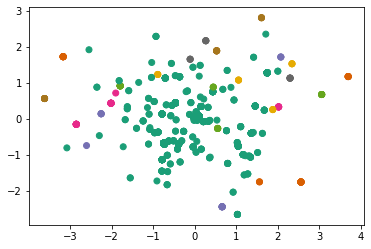

In [231]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

plt.scatter(pca_2d[:,0], pca_2d[:,1], c=y_dbscan, cmap='Dark2')

"""
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == -1:
        plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='*', s=110)
"""

"""
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] % 2 == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='+')
    elif dbscan.labels_[i] % 2 == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='*')
        
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()
"""

In [224]:
pca_2d

array([[ 1.45577191,  0.35428407],
       [ 1.45577191,  0.35428407],
       [ 1.45577191,  0.35428407],
       ...,
       [ 0.26567667,  2.17444862],
       [ 0.1020667 ,  0.07391345],
       [-0.96713853, -0.39104325]])

Referências

- https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
- https://www.dummies.com/programming/big-data/data-science/how-to-create-an-unsupervised-learning-model-with-dbscan/